<a href="https://colab.research.google.com/github/mohnabil2020/machine_learning/blob/master/Shakespeare_words_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**This notebook is for predicting words from Shakespeare  using natural language processing**


---



---
***My target is*** :

Increasing accuracy rate and decreasing loss rate as 

1.   Increasing accuracy rate and decreasing loss rate as possible
2.   prediciting words correctly as possible

3.   Preventing overfitting






In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-08-06 19:45:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-08-06 19:45:19 (71.3 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [4]:
 history = model.fit(predictors,
                     label,
                     epochs=100,
                     verbose=1
                     )

Epoch 1/100
484/484 [==============================] - 13s 27ms/step - loss: 6.9167 - accuracy: 0.0220
Epoch 2/100
484/484 [==============================] - 13s 27ms/step - loss: 6.4955 - accuracy: 0.0205
Epoch 3/100
484/484 [==============================] - 13s 28ms/step - loss: 6.3942 - accuracy: 0.0248
Epoch 4/100
484/484 [==============================] - 13s 27ms/step - loss: 6.2823 - accuracy: 0.0287
Epoch 5/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1922 - accuracy: 0.0365
Epoch 6/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1134 - accuracy: 0.0376
Epoch 7/100
484/484 [==============================] - 13s 26ms/step - loss: 6.0357 - accuracy: 0.0417
Epoch 8/100
484/484 [==============================] - 13s 27ms/step - loss: 5.9588 - accuracy: 0.0448
Epoch 9/100
484/484 [==============================] - 13s 27ms/step - loss: 5.8597 - accuracy: 0.0505
Epoch 10/100
484/484 [==============================] - 13s 27ms/step - l

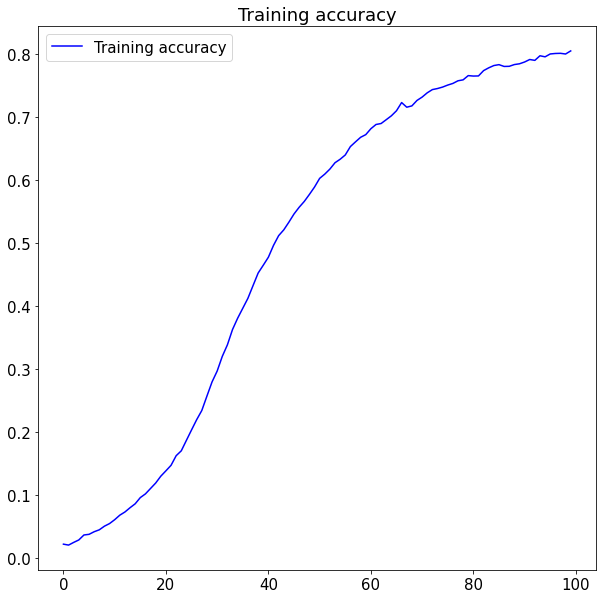

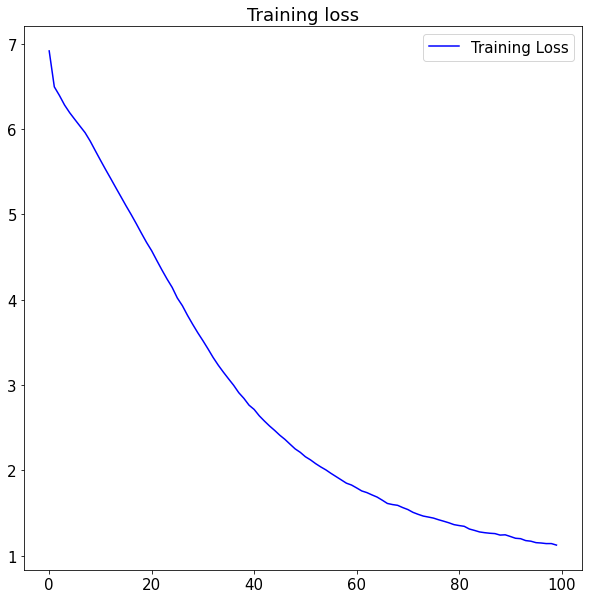

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')

plt.legend()
plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.show()

**This to make 100 words prediction after this sentence:**

"Help me Obi Wan Kenobi, you're my only hope"

In [6]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope some show thee fair sort days forsworn her deeds of hell is 'will ' are confounds that so doth shown appear show thee so foes wit new longer delight than one truth more truth bearing thine days made new skill tongue days doth erred gone to life to some prime spent ' doth grow skill weeds weeds foes height to give complexion sang another care as weeds dead brow dead gems brow date dead brow quite commend curious days weeds spent dead near gone dead quite express'd taken quite curious days rare ill days new fired rare skill gone as
